# Lab - Amostragem

Esta tarefa explora a amostragem do sinal contínuo, mudança da taxa de amostragem com decimação e o teorema de Nyquist.

*Processamento Digital de Sinais - UFPR - Prof. Eduardo Parente Ribeiro*


In [1]:
from pylab import *

a) Considerando um sinal senoidal de 100 Hz amostrado a uma taxa de 1000 A/s durante 0,2 s, construa o vetor a. Plote o sinal amostrado (plot) em função de n e seu espectro (stem) em função da frequencia digital w (rad) no eixo horizontal inferior e a frequencia equivalente em Hertz no eixo horizontal superior.

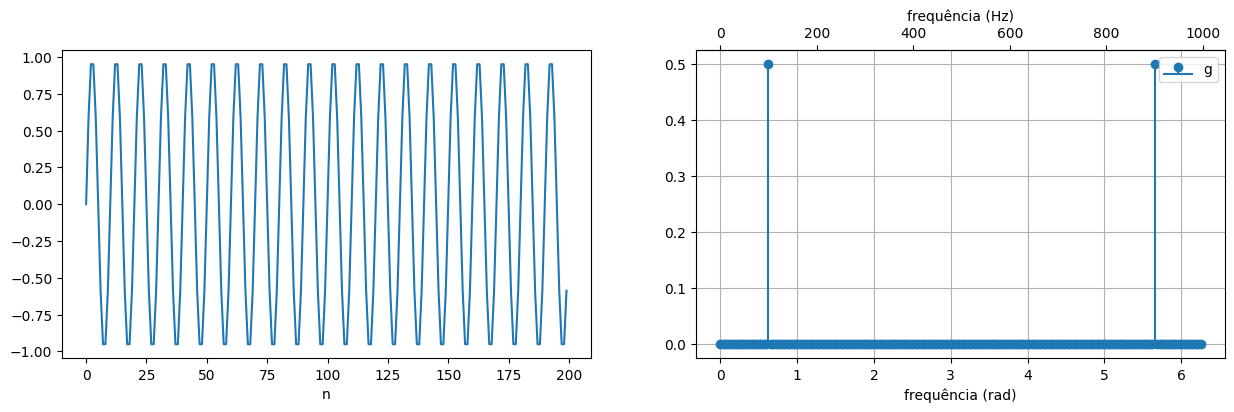

In [2]:
F=100; Fs=1000; T=0.2

N=Fs * T; n=arange(N)
a=sin(2*pi*(F/Fs)*n)

def plotas(x,Fs):
    X=fft(x)/N
    w=linspace(0,2*pi,num=len(X),endpoint=False)

    figure(figsize=(15,4))
    subplot(1,2,1)
    plot(x)
    xlabel('n')
    ax=subplot(1,2,2)
    stem(w,abs(X),linefmt='C0-',markerfmt='C0o',basefmt='C0-')

    def w2f(x):
       return x * Fs / (2*pi)
    def f2w(x):
       return x * 2*pi / Fs
    ax2=ax.secondary_xaxis("top",functions=(w2f,f2w))
    ax2.set_xlabel("frequência (Hz)")
    ax.set_xlabel("frequência (rad)")
    legend('grafico1')
    grid()
    show()

    
plotas(a,Fs)


b) Construa o vetor b, considerando um sinal composto pela soma de três senoides: 60, 110, 160 Hz, com amplitudes 3, 2 e 1, amostrado a uma taxa de 1000 A/s durante 0,2 s. Plote o sinal amostrado (plot) e seu espectro (stem).


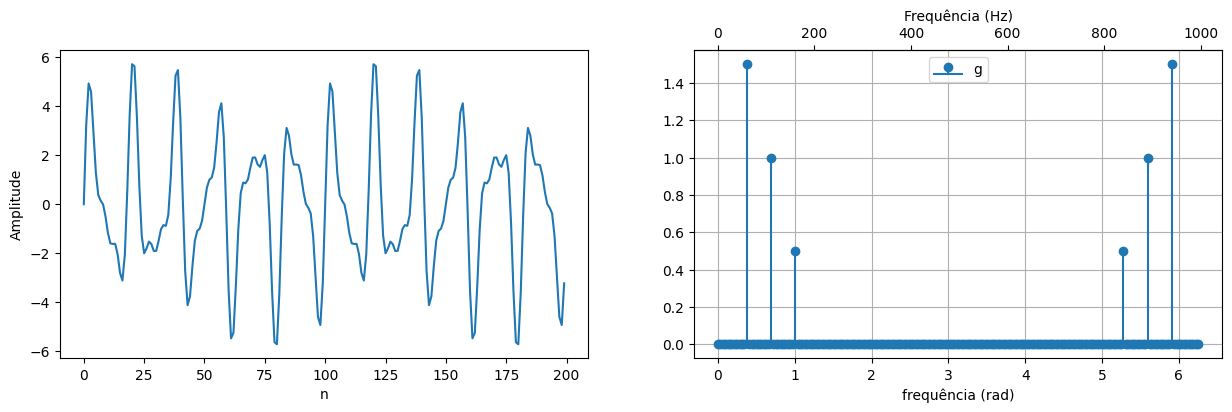

In [3]:
from pylab import *

Frequencies = [60, 110, 160]  
Amplitudes = [3, 2, 1]        

Fs = 1000
T = 0.2

N = int(Fs * T)
n = arange(N)

b = sum([A * sin(2 * pi * (f / Fs) * n) for A, f in zip(Amplitudes, Frequencies)], 0)

def plotas(x, Fs):
    X = fft(x) / N
    w = linspace(0, 2 * pi, num=len(X), endpoint=False)

    figure(figsize=(15, 4))
    
    subplot(1, 2, 1)
    plot(n, x)
    xlabel('n')
    ylabel('Amplitude')
    
    ax = subplot(1, 2, 2)
    stem(w, abs(X), linefmt='C0-', markerfmt='C0o', basefmt='C0-')
    xlabel('frequência (rad)')
    
    def w2f(x):
        return x * Fs / (2 * pi)
    
    def f2w(x):
        return x * 2 * pi / Fs
    
    ax2 = ax.secondary_xaxis("top", functions=(w2f, f2w))
    ax2.set_xlabel("Frequência (Hz)")
    legend(['g'])
    
    grid()
    show()

plotas(b, Fs)


c) Considere que o sinal do item (b) foi amostrado a 500 A/s. Ou seja, construa o vetor c a partir da decimação do vetor b, jogando fora uma amostra para cada amostra. Plote o sinal amostrado (plot) e seu espectro (stem). 


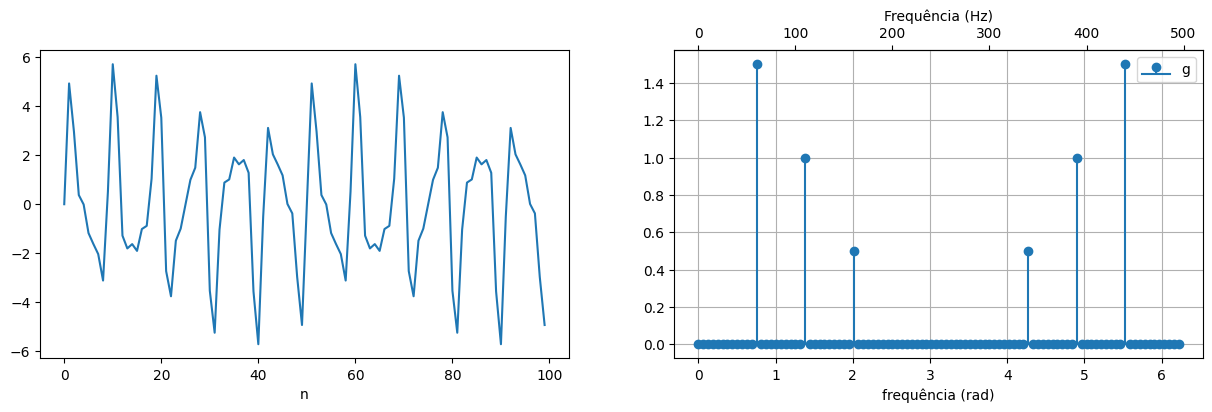

In [4]:
Frequencies = [60, 110, 160]
Amplitudes = [3, 2, 1]

Fs = 1000
T = 0.2

N = int(Fs * T)
n = arange(N)

b = sum([A * sin(2 * pi * (f / Fs) * n) for A, f in zip(Amplitudes, Frequencies)], 0)

Fs_decimated = 500

c = b[::int(Fs / Fs_decimated)]

def plotas(x, Fs):
    X = fft(x) / len(x)
    w = linspace(0, 2 * pi, num=len(X), endpoint=False)

    figure(figsize=(15, 4))
    
    subplot(1, 2, 1)
    plot(arange(len(x)), x)
    xlabel('n')
    
    ax = subplot(1, 2, 2)
    stem(w, abs(X), linefmt='C0-', markerfmt='C0o', basefmt='C0-')
    xlabel('frequência (rad)')
    
    def w2f(x):
        return x * Fs / (2 * pi)
    
    def f2w(x):
        return x * 2 * pi / Fs
    
    ax2 = ax.secondary_xaxis("top", functions=(w2f, f2w))
    ax2.set_xlabel("Frequência (Hz)")
    legend(['g'])

    grid()
    show()

plotas(c, Fs_decimated)


d) Considere que o sinal do item (c) foi amostrado a 250 A/s. Ou seja,Construa o vetor d a partir da decimação do vetor c, jogando fora uma amostra para cada amostra. Plote o sinal amostrado (plot) e seu espectro (stem). 


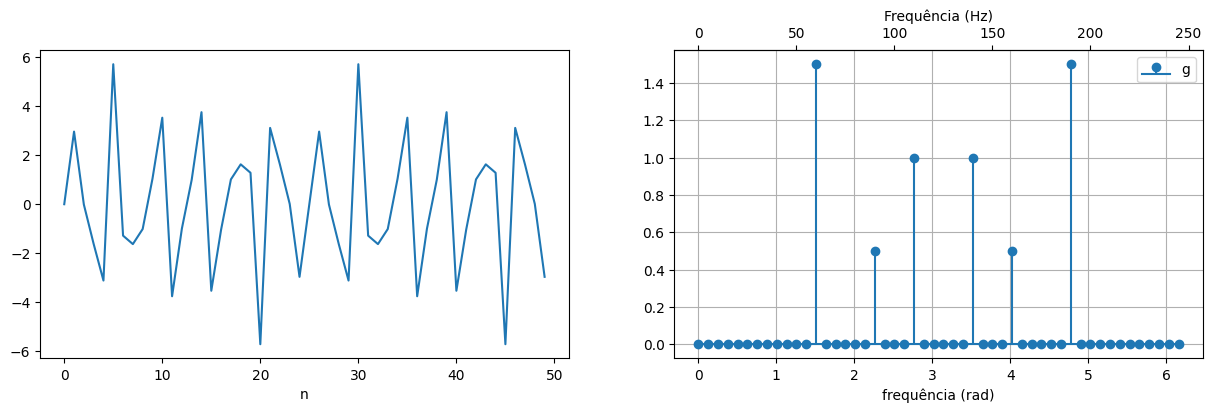

In [5]:
Frequencies = [60, 110, 160]
Amplitudes = [3, 2, 1]

Fs = 1000
T = 0.2

N = int(Fs * T)
n = arange(N)

b = sum([A * sin(2 * pi * (f / Fs) * n) for A, f in zip(Amplitudes, Frequencies)], 0)

Fs_decimated_1 = 500

c = b[::int(Fs / Fs_decimated_1)]

Fs_decimated_2 = 250

d = c[::int(Fs_decimated_1 / Fs_decimated_2)]

def plotas(x, Fs):
    X = fft(x) / len(x)
    w = linspace(0, 2 * pi, num=len(X), endpoint=False)

    figure(figsize=(15, 4))
    
    subplot(1, 2, 1)
    plot(arange(len(x)), x)
    xlabel('n')
    
    ax = subplot(1, 2, 2)
    stem(w, abs(X), linefmt='C0-', markerfmt='C0o', basefmt='C0-')
    xlabel('frequência (rad)')
    
    def w2f(x):
        return x * Fs / (2 * pi)
    
    def f2w(x):
        return x * 2 * pi / Fs
    
    ax2 = ax.secondary_xaxis("top", functions=(w2f, f2w))
    ax2.set_xlabel("Frequência (Hz)")
    legend(['g'])

    grid()
    show()

plotas(d, Fs_decimated_2)


e) Considerando que o período de amostragem $T_s = 1 / F_s, F_s = 1000$ A/s foi mantido na reprodução, plote os três sinais (b,c,d) no mesmo eixo, em função da amostra n. Plote (stem) o spectro dos sinais em função da frequência digital (rad) e da frequência em Hertz.


C:\Users\Carlos\AppData\Local\Temp\ipykernel_12064\1131940374.py:33: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  stem(w, abs(X), markerfmt='.', basefmt=' ', linefmt=color, use_line_collection=False)


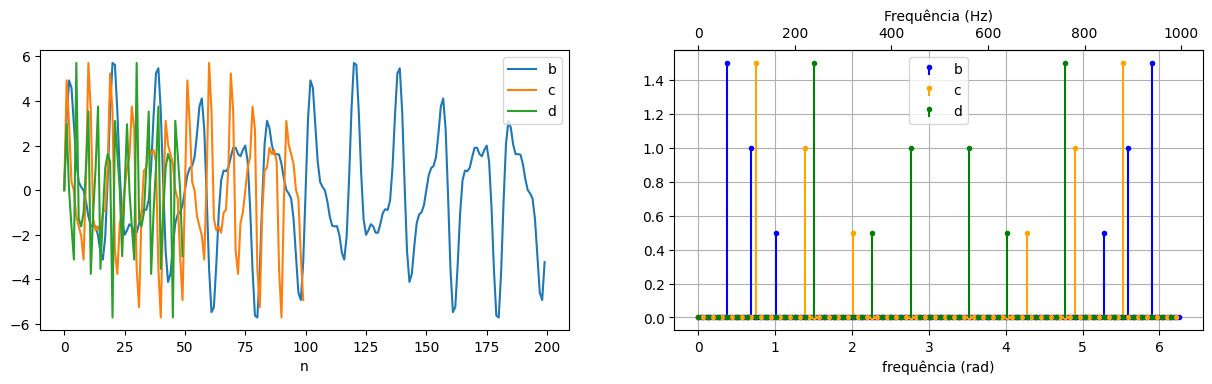

In [6]:
Frequencies = [60, 110, 160]
Amplitudes = [3, 2, 1]

Fs = 1000
T = 0.2

N = int(Fs * T)
n = arange(N)

b = sum([A * sin(2 * pi * (f / Fs) * n) for A, f in zip(Amplitudes, Frequencies)], 0)

Fs_decimated_1 = 500

c = b[::int(Fs / Fs_decimated_1)]

Fs_decimated_2 = 250

d = c[::int(Fs_decimated_1 / Fs_decimated_2)]

def plot_signals_and_spectra(signals, Fs_values, labels, colors):
    figure(figsize=(15, 8))

    subplot(2, 2, 1)
    for signal, label in zip(signals, labels):
        plot(arange(len(signal)), signal, label=label)
    xlabel('n')
    legend(labels)

    subplot(2, 2, 2)
    for signal, color in zip(signals, colors):
        X = fft(signal) / len(signal)
        w = linspace(0, 2 * pi, num=len(X), endpoint=False)
        stem(w, abs(X), markerfmt='.', basefmt=' ', linefmt=color, use_line_collection=False)  
    xlabel('frequência (rad)')
    legend(labels)

    def w2f(x):
        return x * Fs / (2 * pi)

    def f2w(x):
        return x * 2 * pi / Fs

    ax = subplot(2, 2, 2)
    ax2 = ax.secondary_xaxis("top", functions=(w2f, f2w))
    ax2.set_xlabel("Frequência (Hz)")

    grid()

colors = ['b', 'orange', 'g']

plot_signals_and_spectra([b, c, d], [Fs, Fs_decimated_1, Fs_decimated_2], ['b', 'c', 'd'], colors)

show()


f) Considerando que o período de amostragem na reprodução foi o mesmo período correspondente da amostragem, para não alterar as frequencias, $T_s = 1 / F_s, F_s = \{1000 , 500, 250 \}$ A/s, plote os três sinais (b,c,d) no mesmo eixo, em função da amostra n. Plote (stem) o spectro dos sinais em função da frequencia em Hertz, com a frequencia zero no centro, ou seja de -500 a +500 Hz. Dica: usar a função fftshift()

C:\Users\Carlos\AppData\Local\Temp\ipykernel_12064\2305824464.py:31: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  stem(freq, abs(X), markerfmt='.', basefmt=' ', linefmt=color, use_line_collection=False, label=label)


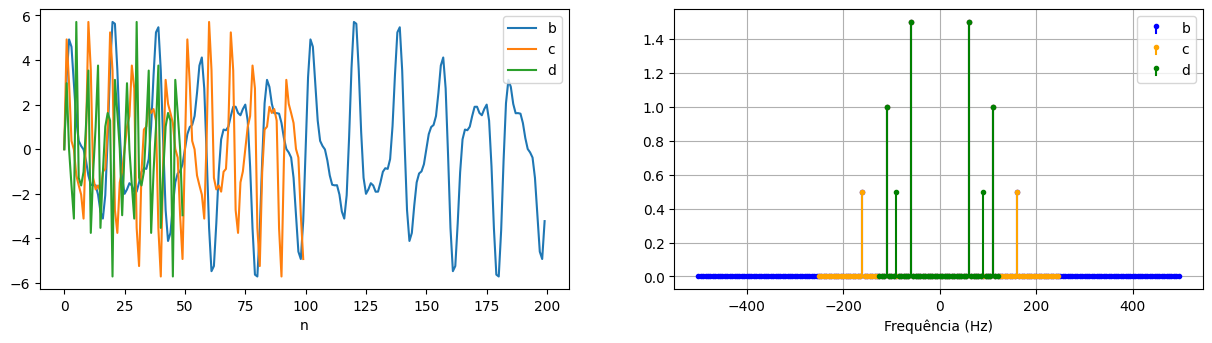

In [7]:
Frequencies = [60, 110, 160]
Amplitudes = [3, 2, 1]

Fs_values = [1000, 500, 250]
T = 0.2

def build_signal(Frequencies, Amplitudes, Fs, T):
    N = int(Fs * T)
    n = arange(N)

    signal = sum([A * sin(2 * pi * (f / Fs) * n) for A, f in zip(Amplitudes, Frequencies)], 0)
    return signal

b = build_signal(Frequencies, Amplitudes, Fs_values[0], T)
c = build_signal(Frequencies, Amplitudes, Fs_values[1], T)
d = build_signal(Frequencies, Amplitudes, Fs_values[2], T)

def plot_signals_and_spectra(signals, Fs_values, labels, colors):
    figure(figsize=(15, 8))

    subplot(2, 2, 1)
    for signal, label in zip(signals, labels):
        plot(arange(len(signal)), signal, label=label)
    xlabel('n')
    legend()

    subplot(2, 2, 2)
    for signal, color, Fs, label in zip(signals, colors, Fs_values, labels):
        X = fftshift(fft(signal)) / len(signal)
        freq = fftshift(fftfreq(len(X), 1 / Fs))
        stem(freq, abs(X), markerfmt='.', basefmt=' ', linefmt=color, use_line_collection=False, label=label)
    xlabel('Frequência (Hz)')
    legend()

    grid()

colors = ['b', 'orange', 'g']
labels = ['b', 'c', 'd']

plot_signals_and_spectra([b, c, d], Fs_values, labels, colors)

show()


g) construa o vetor g, inserindo zeros entre as amostras do vetor c. Plote o sinal (plot) e seu espectro (stem). 

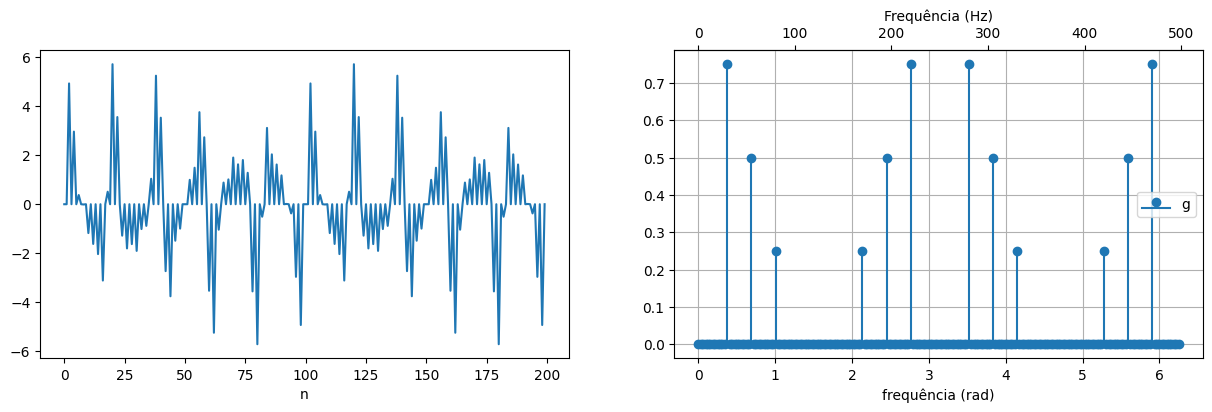

In [8]:
Frequencies = [60, 110, 160]
Amplitudes = [3, 2, 1]

Fs = 1000
T = 0.2

N = int(Fs * T)
n = arange(N)

b = sum([A * sin(2 * pi * (f / Fs) * n) for A, f in zip(Amplitudes, Frequencies)], 0)

Fs_decimated_1 = 500

c = b[::int(Fs / Fs_decimated_1)]

zero_padding_factor = 2
g = zeros(len(c) * zero_padding_factor)
g[::zero_padding_factor] = c

def plotas(x, Fs):
    X = fft(x) / len(x)
    w = linspace(0, 2 * pi, num=len(X), endpoint=False)

    figure(figsize=(15, 4))
    
    subplot(1, 2, 1)
    plot(arange(len(x)), x)
    xlabel('n')
    
    ax = subplot(1, 2, 2)
    stem(w, abs(X), linefmt='C0-', markerfmt='C0o', basefmt='C0-')
    xlabel('frequência (rad)')
    
    def w2f(x):
        return x * Fs / (2 * pi)
    
    def f2w(x):
        return x * 2 * pi / Fs
    
    ax2 = ax.secondary_xaxis("top", functions=(w2f, f2w))
    ax2.set_xlabel("Frequência (Hz)")
    legend(['g'])
    
    grid()
    show()

plotas(g, Fs_decimated_1)


h) contrua o vetor h, inserindo três zeros entre as amostras do vetor d. Plote o sinal (plot) e seu espectro (stem). 

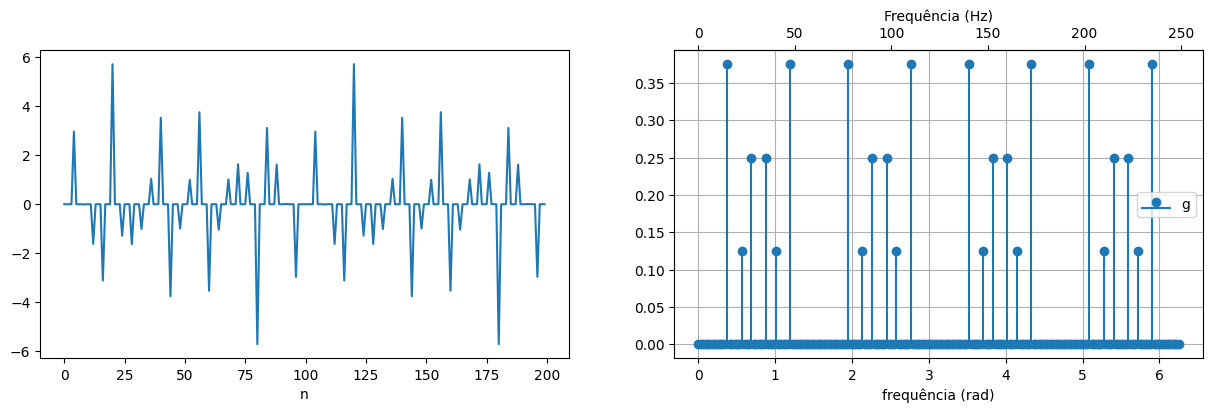

In [9]:
Frequencies = [60, 110, 160]
Amplitudes = [3, 2, 1]

Fs = 1000
T = 0.2

N = int(Fs * T)
n = arange(N)

b = sum([A * sin(2 * pi * (f / Fs) * n) for A, f in zip(Amplitudes, Frequencies)], 0)

Fs_decimated_1 = 500

c = b[::int(Fs / Fs_decimated_1)]

Fs_decimated_2 = 250

d = c[::int(Fs_decimated_1 / Fs_decimated_2)]

zero_padding_factor = 4
h = zeros(len(d) * zero_padding_factor)
h[::zero_padding_factor] = d

def plotas(x, Fs):
    X = fft(x) / len(x)
    w = linspace(0, 2 * pi, num=len(X), endpoint=False)

    figure(figsize=(15, 4))
    
    subplot(1, 2, 1)
    plot(arange(len(x)), x)
    xlabel('n')
    
    ax = subplot(1, 2, 2)
    stem(w, abs(X), linefmt='C0-', markerfmt='C0o', basefmt='C0-')
    xlabel('frequência (rad)')
    
    def w2f(x):
        return x * Fs / (2 * pi)
    
    def f2w(x):
        return x * 2 * pi / Fs
    
    ax2 = ax.secondary_xaxis("top", functions=(w2f, f2w))
    ax2.set_xlabel("Frequência (Hz)")
    legend(['g'])

    grid()
    show()

plotas(h, Fs_decimated_2)


i) responda:
1) em que caso(s) aconteceu "aliasing" (c) e/ou (d) ?<br>
Aliasing ocorre no caso (c), onde o sinal foi decimado para 500 A/s.

2) que senoide(s) sofreram "aliasing" 60, 110, ou 160 Hz ?<br>
A senoide de 160 Hz sofreu aliasing.

3) qual a(s) frequencia(s) equivalente em Hertz após o "aliasing" ?<br>
Após o aliasing, a frequência equivalente em Hertz da senoide de 160 Hz é 160 - 500 = -340 Hz. Isso ocorre porque a frequência foi dobrada (500 Hz) e depois subtraída da frequência original. Portanto, o sinal sofreu aliasing para uma frequência negativa.